We want:

- subtype maps
- prior of the network
- average connectivity for network

The last one is tricky because after regression, the average is 0. So we could either:
- use the grand average before regression (not ideal)
- use the STD maps
- look at t-test maps

For now, I'll just look at all of them

In [1]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
import nilearn as nil
from matplotlib import gridspec
from nilearn import plotting as nlp
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# Paths
# Let's start with the full sample, maybe data, mean subtype at scale 7. We look at everything
pri_path = '/data1/cambridge/template/template_cambridge_basc_multiscale_sym_scale007.nii.gz'
res_path = '/data1/guilimin/abide/subtype/sc7/full_maybe/network_{}/'
mod_path = '/data1/guilimin/abide/pheno/sc7/model_full_maybe_sc7.csv'

In [4]:
mod = pd.read_csv(mod_path)

In [5]:
tmp_i = nib.load(pri_path)
template = tmp_i.get_data()

In [6]:
# Split and recombine the priors into a 4D image
scale = 7
prior_template = np.zeros((template.shape + (scale,)))
for sc_id in range(scale):
    tmp = np.zeros_like(template)
    tmp[template==sc_id+1] = sc_id + 1
    prior_template[..., sc_id] = tmp
prior_img = nib.Nifti1Image(prior_template, affine=tmp_i.get_affine(), header=tmp_i.get_header())

## Network 1 - Cerebellum

In [7]:
#/data1/guilimin/abide/subtype/sc7/full_maybe/network_1/

In [9]:
network = 1
sbt_img = nib.load(os.path.join(res_path.format(network), 'mean_subtype.nii.gz'))
#ttt_img = nib.load(os.path.join(res_path.format(network), 'ttest_subtype.nii.gz'))
#eff_img = nib.load(os.path.join(res_path.format(network), 'eff_subtype.nii.gz'))

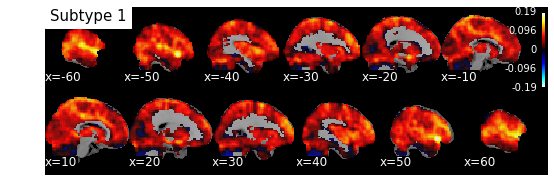

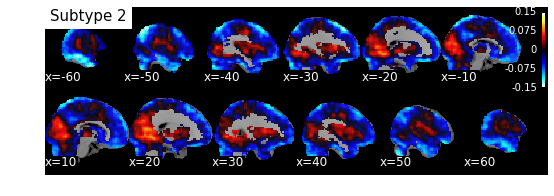

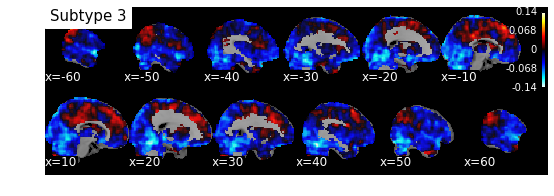

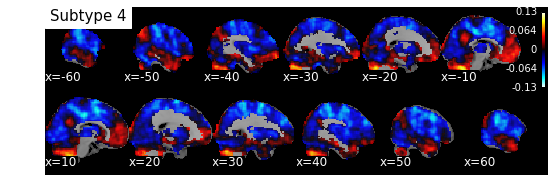

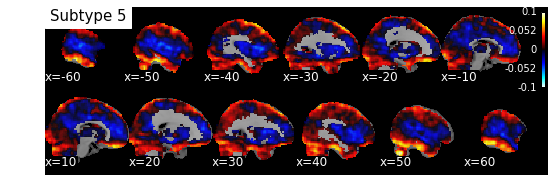

In [11]:
nlp.plot_stat_map(nil.image.index_img(sbt_img, sbt_id), display_mode='x', alpha=0.9,
                  cut_coords=np.arange(-60,0,10), black_bg=True, axes=ax_a,
                  title='Subtype {}'.format(sbt_id+1))
for sbt_id in np.arange(5):
    # Get the seed map
    # Display the seed map
    fig = plt.figure(figsize=(9,3))
    gs = gridspec.GridSpec(2, 1, hspace=0)
    ax_a = fig.add_subplot(gs[0,0])
    ax_b = fig.add_subplot(gs[1,0])
    
    nlp.plot_stat_map(nil.image.index_img(sbt_img, sbt_id), display_mode='x', alpha=0.9,
                            cut_coords=np.arange(-60,0,10), black_bg=True, axes=ax_a,
                            title='Subtype {}'.format(sbt_id+1))
    nlp.plot_stat_map(nil.image.index_img(sbt_img, sbt_id), display_mode='x', alpha=0.9,
                      cut_coords=np.arange(60,0,-10), black_bg=True, axes=ax_b,
                      colorbar=False)

In [15]:
scale

7

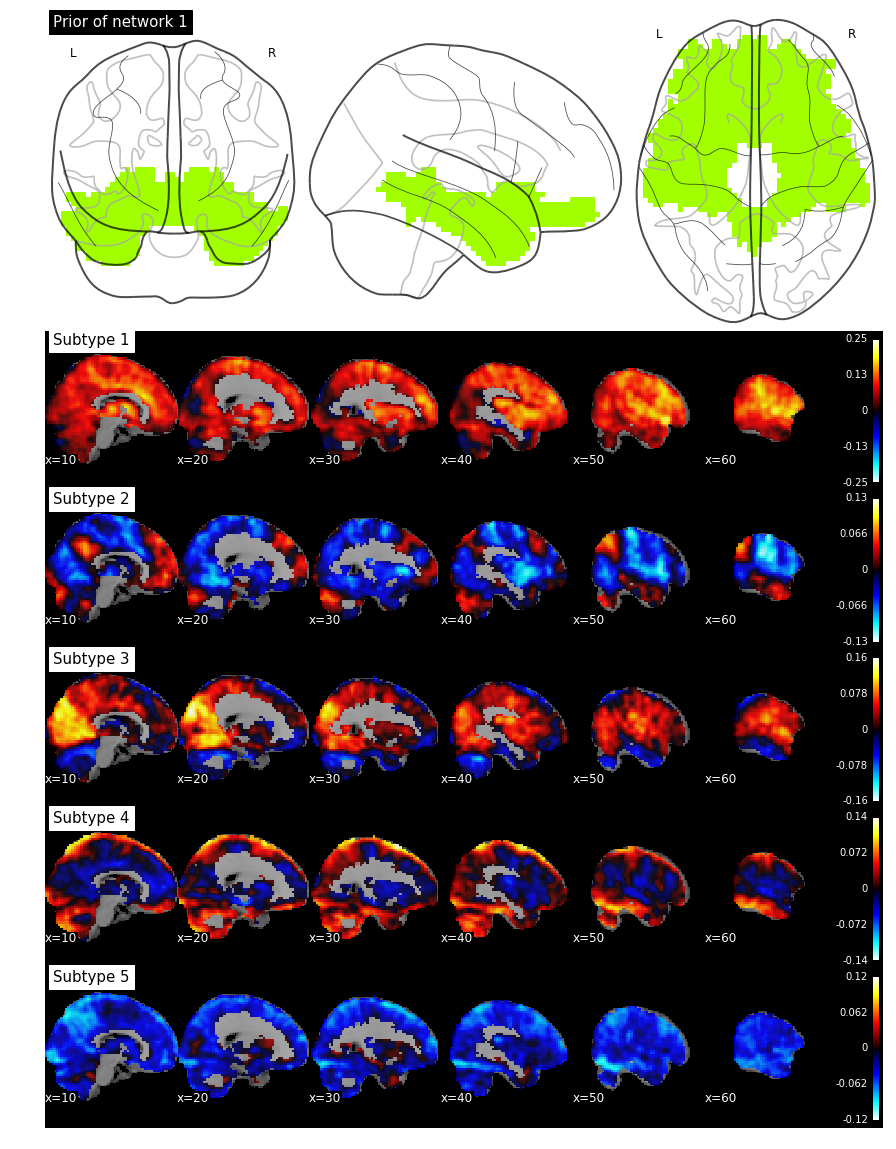

In [17]:
network = 1
res_img = nib.load(os.path.join(res_path.format(network+1), 'mean_subtype.nii.gz'))

fig = plt.figure(figsize=(15,20))
gs = gridspec.GridSpec(11, 1, hspace=0)
axo = fig.add_subplot(gs[0,0])
nlp.plot_glass_brain(nil.image.index_img(prior_img, network), cmap=plt.cm.spectral, 
                             axes=axo, colorbar=False, title='Prior of network {}'.format(network),
                            vmin=1, vmax=scale)
# Show the average map
for sbt_id in np.arange(5):
    axi = fig.add_subplot(gs[sbt_id+2,0])
    tmp = nlp.plot_stat_map(nil.image.index_img(res_img, sbt_id), display_mode='x', alpha=0.9,
                            cut_coords=np.arange(10,61,10), black_bg=True, axes=axi,
                            title='Subtype {}'.format(sbt_id+1))

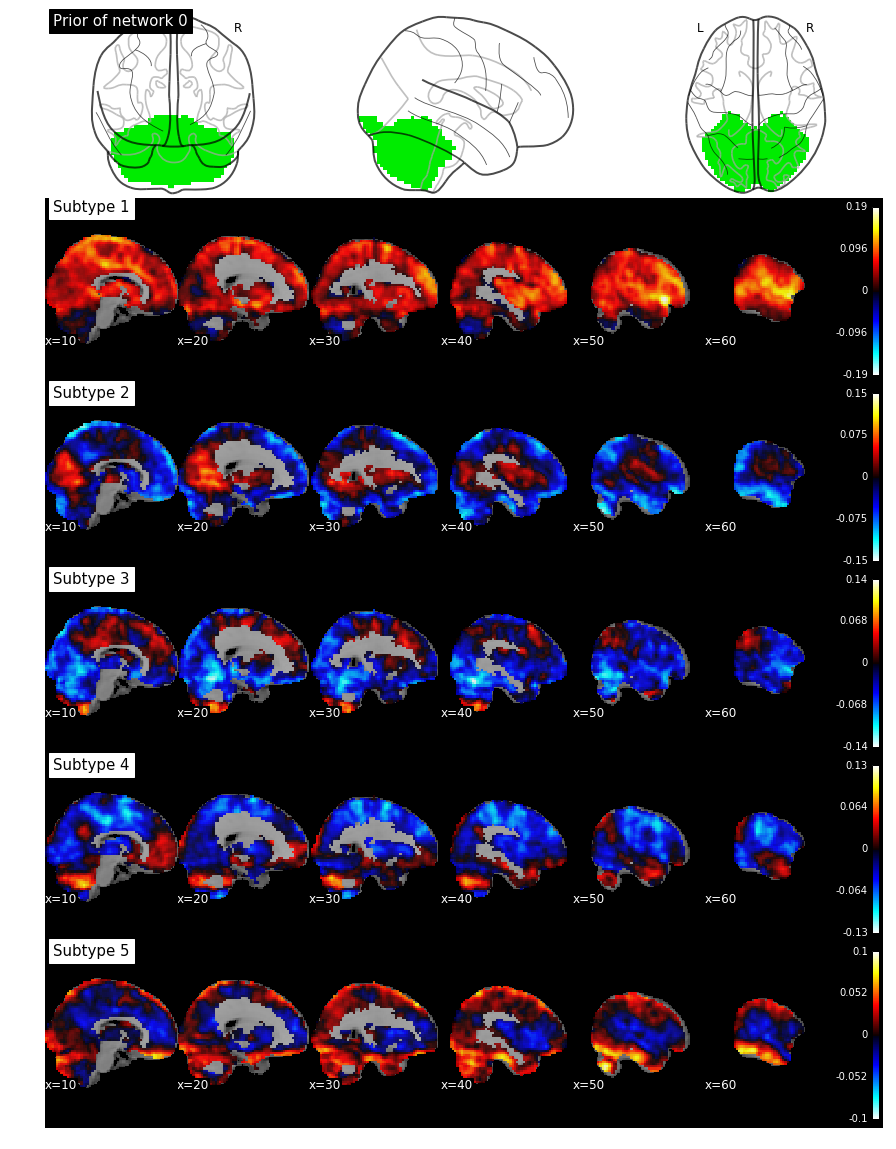

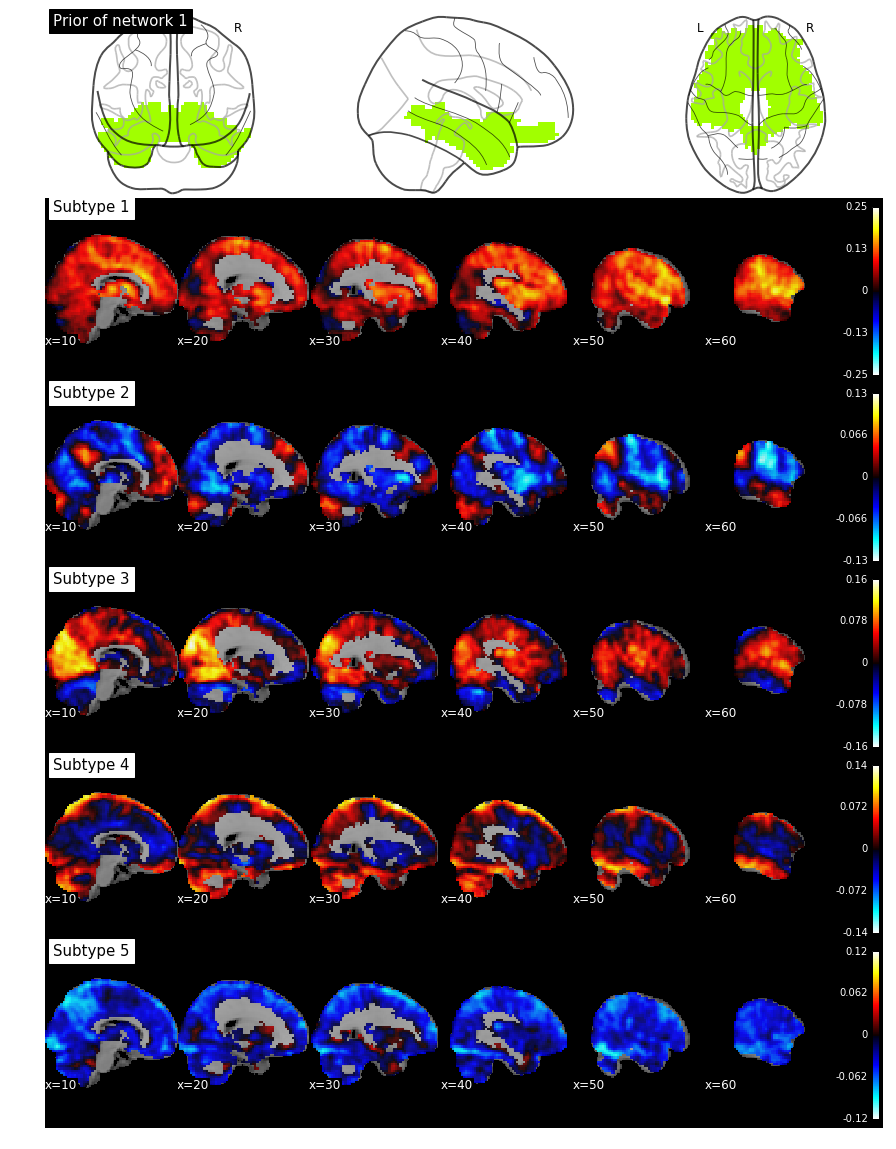

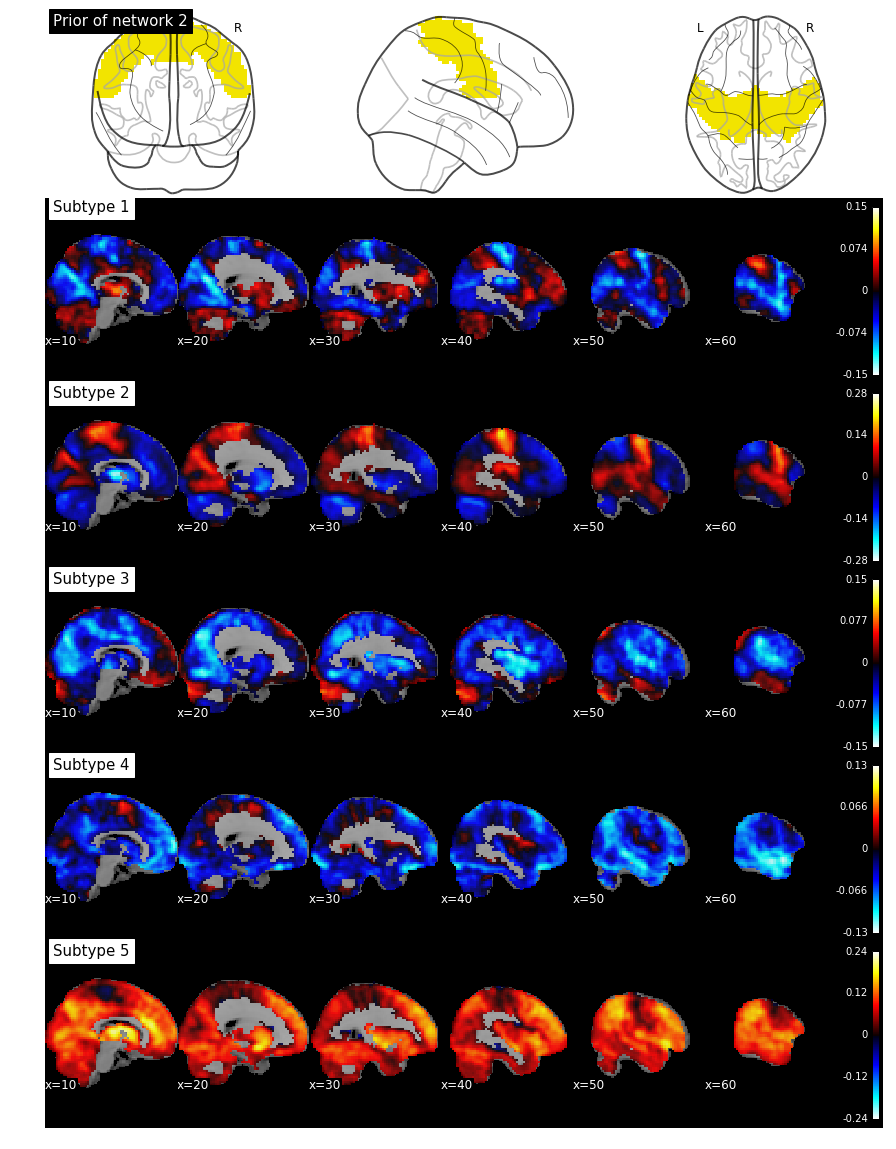

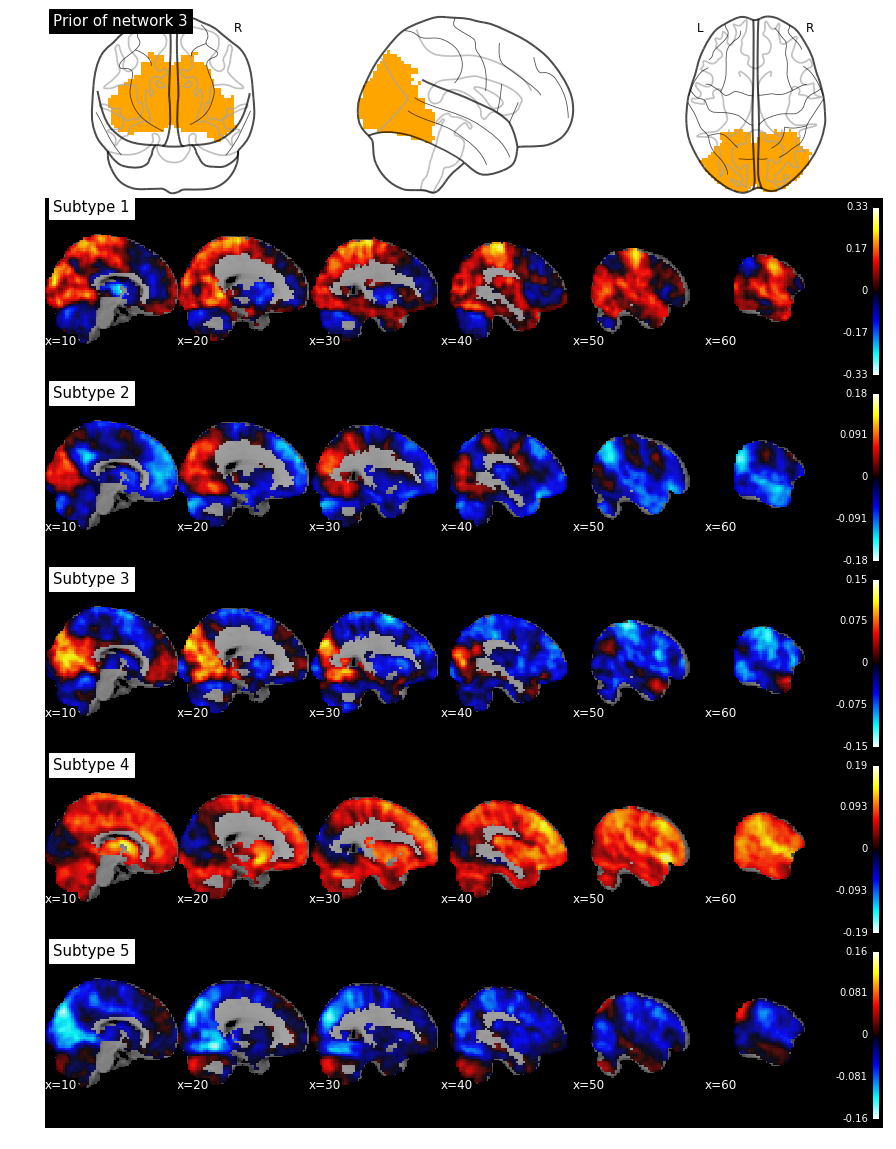

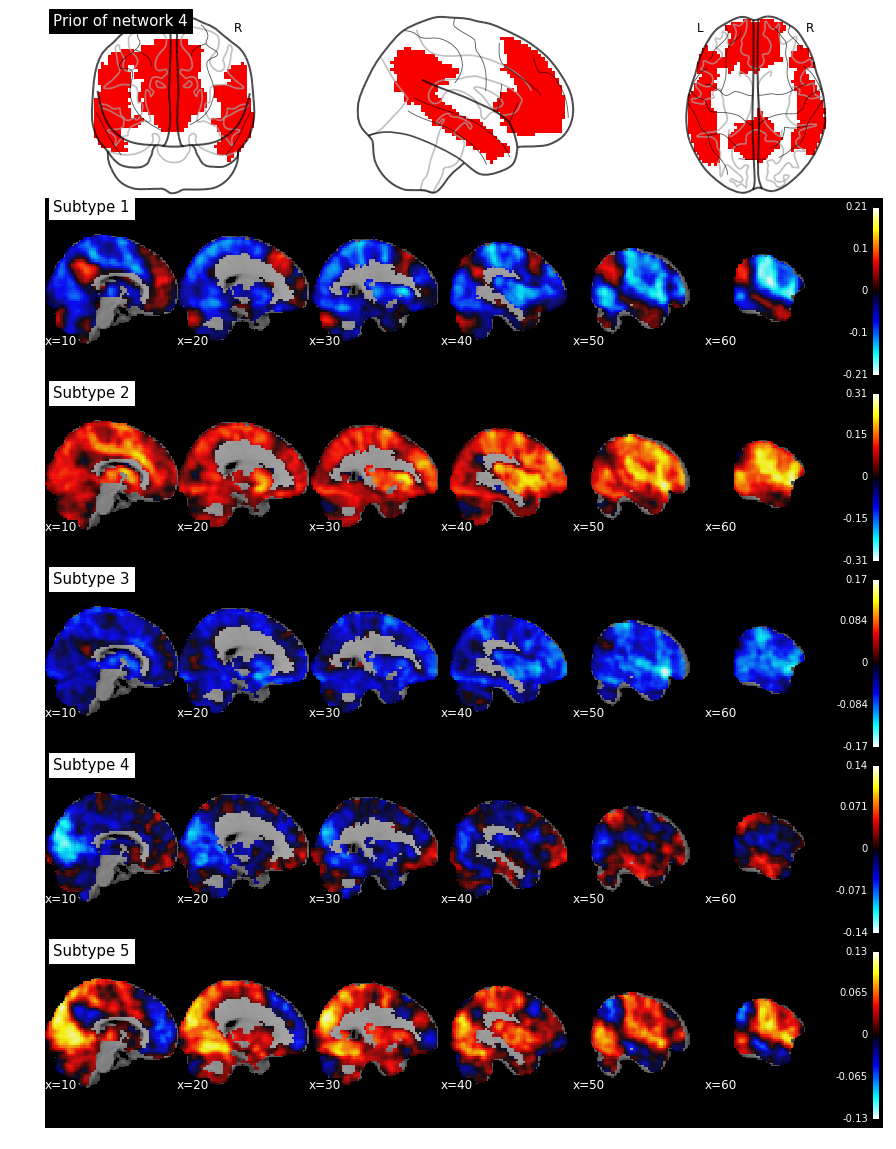

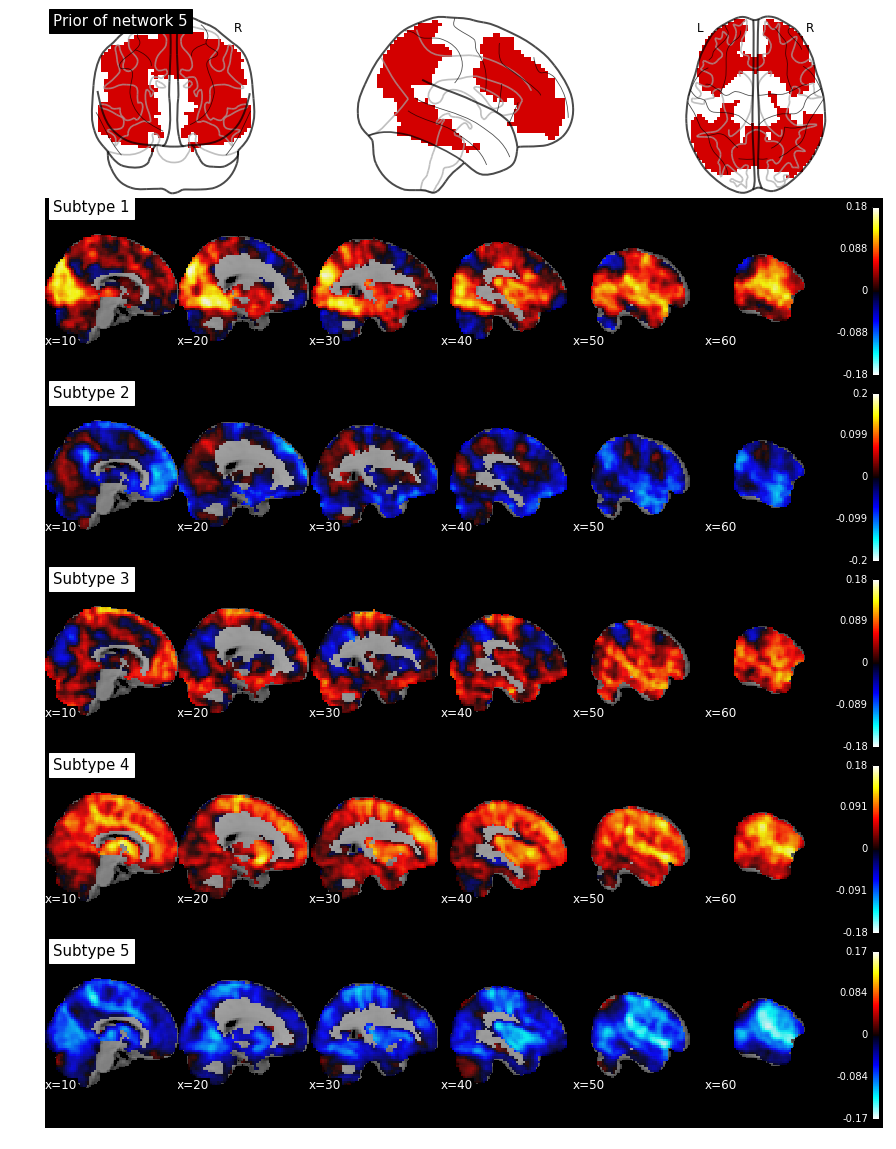

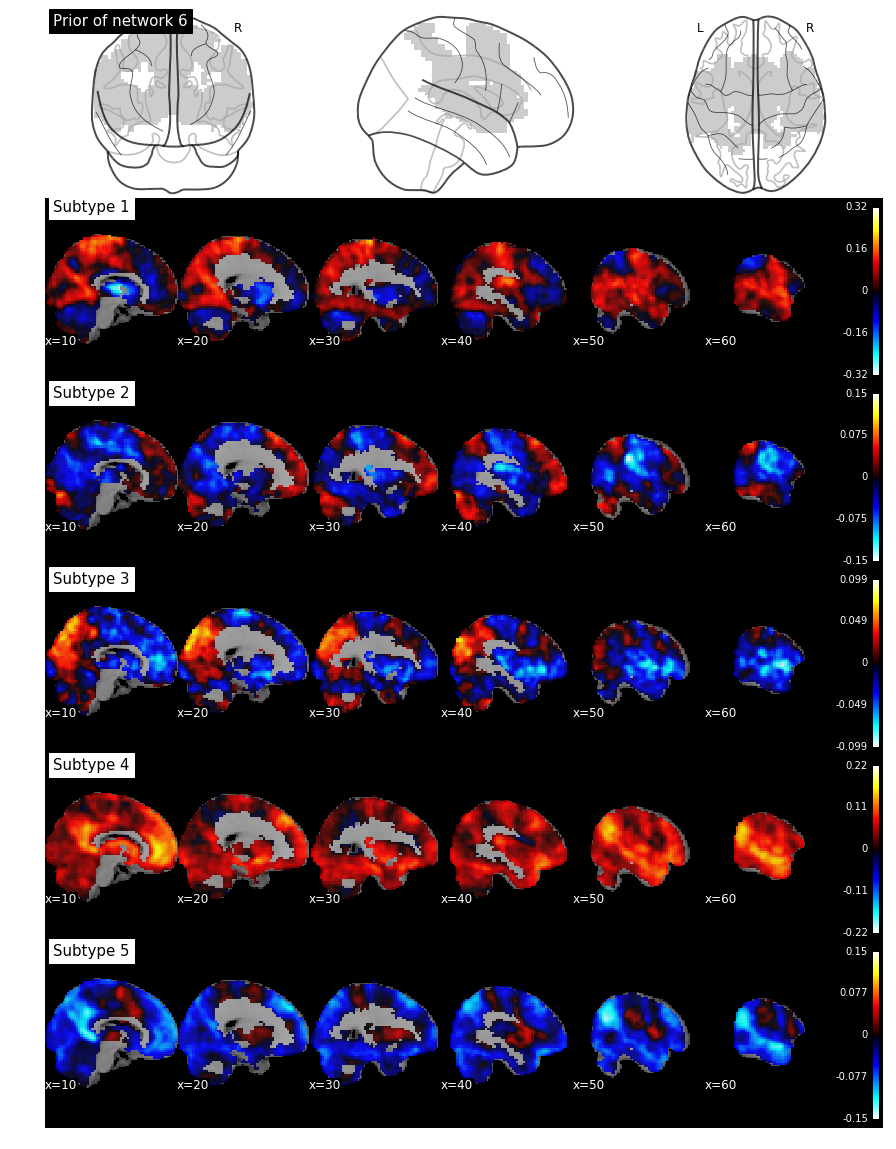

In [14]:
for network in np.arange(7):
    res_img = nib.load(os.path.join(res_path.format(network+1), 'mean_subtype.nii.gz'))

    fig = plt.figure(figsize=(15,20))
    gs = gridspec.GridSpec(7, 1, hspace=0)
    axo = fig.add_subplot(gs[0:1,0])
    nlp.plot_glass_brain(nil.image.index_img(prior_img, network), cmap=plt.cm.spectral, 
                                 axes=axo, colorbar=False, title='Prior of network {}'.format(network),
                                vmin=1, vmax=scale)
    # Show the average map
    for sbt_id in np.arange(5):
        axi = fig.add_subplot(gs[sbt_id+1,0])
        tmp = nlp.plot_stat_map(nil.image.index_img(res_img, sbt_id), display_mode='x', alpha=0.9,
                                cut_coords=np.arange(10,61,10), black_bg=True, axes=axi,
                                title='Subtype {}'.format(sbt_id+1))